In [1]:
import keras 
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from keras.datasets import imdb #cargo los datos del imdb
from numpy import genfromtxt
from keras.utils import to_categorical
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [2]:
def randomize(x,y):
    #x matriz de datos (datos x dimension)
    #y matriz de datos verdaderos (datos x 1)
    indices = np.random.choice(x.shape[0], x.shape[0], replace=False)
    x = x[indices]
    y = y[indices]
    return x,y

In [3]:
#cargo los datos
data = genfromtxt('pima-indians-diabetes.csv', delimiter=',') #cargo los datos
x_total = data[:,:8] #valores de los datos relevantes para saber si tiene/no tiene diabetes
y_total = data[:,8] #diagnostico (1 o 0, si o no tiene la enfermedad)
n_datos = x_total.shape[0] #o sea, n_datos = 768
n_dim = x_total.shape[1] #o sea, n_dim = 8
#corrijo los valores que daban cero por el promedio de los que no son cero 
j = 1
i = 0
while j <= 6:
    n_zero = (x_total[:,j][x_total[:,j]!=0]).shape[0] #cosas en cada fila no cero
    mean = sum(x_total[:,j])/n_zero #suma de las cosas (los que son =0 no van a contar)
    while i < n_datos:
        if x_total[i,j] == 0:
            x_total[i,j] = mean
        i += 1
    j += 1

In [4]:
#formateo 
#creo datos de test y train primero, como lo haciamos antes
cant_test = int(0.2*n_datos)
x_total,y_total = randomize(x_total,y_total)
y_total = to_categorical(y_total)
x_train = x_total[cant_test:,:]
y_train = y_total[cant_test:]
x_test = x_total[:cant_test,:]
y_test = y_total[:cant_test]
mean = np.mean(x_train,axis=0)
sigma = np.std(x_train,axis=0)
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma

In [49]:
#defino algunas constantes que son utiles, como en problemas anteriores
n_capa1 = 500 #dice 2 porque iba a ser de la capa 2
n_capa2 = 50
n_capa3 = 2 #idem. por prueba empirica y tiempo, al ver que funcionaba lo deje asi. 
rg = 1e-2
epocas = 200 #cantidad de epocas

In [50]:
x = keras.layers.Input(shape=(n_dim,)) #capa de input
l1 = keras.layers.Dense(units=n_capa1, activation='relu', 
                        kernel_regularizer=keras.regularizers.l2(rg))(x)
l2 = keras.layers.Dense(units=n_capa2, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(rg))(l1)
l3 = keras.layers.Dense(units=n_capa3, activation='sigmoid',
                        kernel_regularizer=keras.regularizers.l2(rg))(l2)
model = keras.Model(inputs=x, outputs=l3)
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epocas,shuffle=True, validation_data=(x_test, y_test),batch_size=100, verbose=2)

Train on 615 samples, validate on 153 samples
Epoch 1/200
 - 0s - loss: 1.7097 - acc: 0.6846 - val_loss: 1.5863 - val_acc: 0.6863
Epoch 2/200
 - 0s - loss: 1.5125 - acc: 0.7528 - val_loss: 1.4120 - val_acc: 0.7190
Epoch 3/200
 - 0s - loss: 1.3449 - acc: 0.7561 - val_loss: 1.2670 - val_acc: 0.7190
Epoch 4/200
 - 0s - loss: 1.2025 - acc: 0.7691 - val_loss: 1.1465 - val_acc: 0.7190
Epoch 5/200
 - 0s - loss: 1.0843 - acc: 0.7756 - val_loss: 1.0470 - val_acc: 0.7255
Epoch 6/200
 - 0s - loss: 0.9870 - acc: 0.7805 - val_loss: 0.9652 - val_acc: 0.7386
Epoch 7/200
 - 0s - loss: 0.9084 - acc: 0.7821 - val_loss: 0.9007 - val_acc: 0.7386
Epoch 8/200
 - 0s - loss: 0.8451 - acc: 0.7886 - val_loss: 0.8479 - val_acc: 0.7386
Epoch 9/200
 - 0s - loss: 0.7942 - acc: 0.7919 - val_loss: 0.8048 - val_acc: 0.7255
Epoch 10/200
 - 0s - loss: 0.7539 - acc: 0.7935 - val_loss: 0.7685 - val_acc: 0.7255
Epoch 11/200
 - 0s - loss: 0.7210 - acc: 0.7902 - val_loss: 0.7403 - val_acc: 0.7516
Epoch 12/200
 - 0s - loss: 0

Epoch 97/200
 - 0s - loss: 0.5860 - acc: 0.7902 - val_loss: 0.6245 - val_acc: 0.7516
Epoch 98/200
 - 0s - loss: 0.5870 - acc: 0.7772 - val_loss: 0.6245 - val_acc: 0.7386
Epoch 99/200
 - 0s - loss: 0.5856 - acc: 0.7772 - val_loss: 0.6255 - val_acc: 0.7386
Epoch 100/200
 - 0s - loss: 0.5852 - acc: 0.7854 - val_loss: 0.6246 - val_acc: 0.7320
Epoch 101/200
 - 0s - loss: 0.5861 - acc: 0.7821 - val_loss: 0.6257 - val_acc: 0.7451
Epoch 102/200
 - 0s - loss: 0.5849 - acc: 0.7837 - val_loss: 0.6226 - val_acc: 0.7582
Epoch 103/200
 - 0s - loss: 0.5855 - acc: 0.7854 - val_loss: 0.6215 - val_acc: 0.7516
Epoch 104/200
 - 0s - loss: 0.5854 - acc: 0.7837 - val_loss: 0.6219 - val_acc: 0.7516
Epoch 105/200
 - 0s - loss: 0.5865 - acc: 0.7805 - val_loss: 0.6197 - val_acc: 0.7582
Epoch 106/200
 - 0s - loss: 0.5848 - acc: 0.7805 - val_loss: 0.6255 - val_acc: 0.7255
Epoch 107/200
 - 0s - loss: 0.5879 - acc: 0.7854 - val_loss: 0.6237 - val_acc: 0.7386
Epoch 108/200
 - 0s - loss: 0.5849 - acc: 0.7854 - val_lo

Epoch 193/200
 - 0s - loss: 0.5870 - acc: 0.7789 - val_loss: 0.6148 - val_acc: 0.7582
Epoch 194/200
 - 0s - loss: 0.5840 - acc: 0.7902 - val_loss: 0.6223 - val_acc: 0.7320
Epoch 195/200
 - 0s - loss: 0.5858 - acc: 0.7870 - val_loss: 0.6217 - val_acc: 0.7386
Epoch 196/200
 - 0s - loss: 0.5846 - acc: 0.7919 - val_loss: 0.6247 - val_acc: 0.7320
Epoch 197/200
 - 0s - loss: 0.5842 - acc: 0.7870 - val_loss: 0.6210 - val_acc: 0.7582
Epoch 198/200
 - 0s - loss: 0.5843 - acc: 0.7821 - val_loss: 0.6222 - val_acc: 0.7386
Epoch 199/200
 - 0s - loss: 0.5836 - acc: 0.7821 - val_loss: 0.6215 - val_acc: 0.7386
Epoch 200/200
 - 0s - loss: 0.5837 - acc: 0.7789 - val_loss: 0.6248 - val_acc: 0.7386


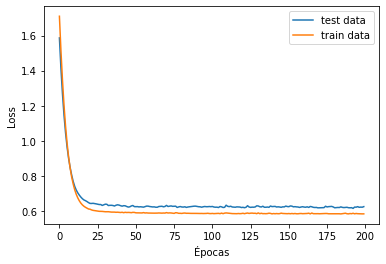

In [51]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej62_1_lossepoch.pdf')

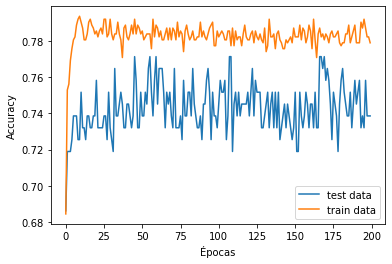

In [52]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej62_1_lossacc.pdf')

In [86]:
#defino algunas constantes que son utiles, como en problemas anteriores
n_capa1 = 20 #dice 2 porque iba a ser de la capa 2
n_capa2 = 20
n_capa3 = 10
n_capa4 = 5
n_capa5 = 2 #idem. por prueba empirica y tiempo, al ver que funcionaba lo deje asi. 
rg = 1e-2
epocas = 200 #cantidad de epocas

In [93]:
x = keras.layers.Input(shape=(n_dim,)) #capa de input
l1 = keras.layers.Dense(units=n_capa1, activation='relu', 
                        kernel_regularizer=keras.regularizers.l2(rg))(x)
l2 = keras.layers.Dense(units=n_capa2, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(rg))(l1)
l3 = keras.layers.Dense(units=n_capa3, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(rg))(l2)
l4 = keras.layers.Dense(units=n_capa4, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(rg))(l3)
l5 = keras.layers.Dense(units=n_capa6, activation='sigmoid',
                        kernel_regularizer=keras.regularizers.l2(rg))(l4)
model = keras.Model(inputs=x, outputs=l5)
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epocas,shuffle=True, validation_data=(x_test, y_test),batch_size=100, verbose=2)

Train on 615 samples, validate on 153 samples
Epoch 1/200
 - 0s - loss: 1.2005 - acc: 0.6276 - val_loss: 1.1854 - val_acc: 0.6536
Epoch 2/200
 - 0s - loss: 1.1751 - acc: 0.6439 - val_loss: 1.1611 - val_acc: 0.6536
Epoch 3/200
 - 0s - loss: 1.1502 - acc: 0.6504 - val_loss: 1.1378 - val_acc: 0.6536
Epoch 4/200
 - 0s - loss: 1.1262 - acc: 0.6504 - val_loss: 1.1156 - val_acc: 0.6536
Epoch 5/200
 - 0s - loss: 1.1031 - acc: 0.6504 - val_loss: 1.0944 - val_acc: 0.6536
Epoch 6/200
 - 0s - loss: 1.0814 - acc: 0.6504 - val_loss: 1.0742 - val_acc: 0.6536
Epoch 7/200
 - 0s - loss: 1.0602 - acc: 0.6504 - val_loss: 1.0551 - val_acc: 0.6536
Epoch 8/200
 - 0s - loss: 1.0403 - acc: 0.6504 - val_loss: 1.0370 - val_acc: 0.6536
Epoch 9/200
 - 0s - loss: 1.0211 - acc: 0.6504 - val_loss: 1.0196 - val_acc: 0.6536
Epoch 10/200
 - 0s - loss: 1.0030 - acc: 0.6504 - val_loss: 1.0029 - val_acc: 0.6536
Epoch 11/200
 - 0s - loss: 0.9853 - acc: 0.6504 - val_loss: 0.9871 - val_acc: 0.6536
Epoch 12/200
 - 0s - loss: 0

Epoch 97/200
 - 0s - loss: 0.6217 - acc: 0.7854 - val_loss: 0.6576 - val_acc: 0.7386
Epoch 98/200
 - 0s - loss: 0.6213 - acc: 0.7854 - val_loss: 0.6569 - val_acc: 0.7386
Epoch 99/200
 - 0s - loss: 0.6210 - acc: 0.7837 - val_loss: 0.6567 - val_acc: 0.7386
Epoch 100/200
 - 0s - loss: 0.6209 - acc: 0.7805 - val_loss: 0.6568 - val_acc: 0.7451
Epoch 101/200
 - 0s - loss: 0.6204 - acc: 0.7837 - val_loss: 0.6559 - val_acc: 0.7451
Epoch 102/200
 - 0s - loss: 0.6199 - acc: 0.7854 - val_loss: 0.6551 - val_acc: 0.7451
Epoch 103/200
 - 0s - loss: 0.6196 - acc: 0.7870 - val_loss: 0.6542 - val_acc: 0.7516
Epoch 104/200
 - 0s - loss: 0.6195 - acc: 0.7870 - val_loss: 0.6544 - val_acc: 0.7386
Epoch 105/200
 - 0s - loss: 0.6193 - acc: 0.7821 - val_loss: 0.6549 - val_acc: 0.7451
Epoch 106/200
 - 0s - loss: 0.6189 - acc: 0.7854 - val_loss: 0.6545 - val_acc: 0.7451
Epoch 107/200
 - 0s - loss: 0.6185 - acc: 0.7854 - val_loss: 0.6549 - val_acc: 0.7386
Epoch 108/200
 - 0s - loss: 0.6185 - acc: 0.7837 - val_lo

Epoch 193/200
 - 0s - loss: 0.6087 - acc: 0.7854 - val_loss: 0.6452 - val_acc: 0.7451
Epoch 194/200
 - 0s - loss: 0.6085 - acc: 0.7870 - val_loss: 0.6455 - val_acc: 0.7386
Epoch 195/200
 - 0s - loss: 0.6086 - acc: 0.7854 - val_loss: 0.6450 - val_acc: 0.7451
Epoch 196/200
 - 0s - loss: 0.6084 - acc: 0.7902 - val_loss: 0.6465 - val_acc: 0.7386
Epoch 197/200
 - 0s - loss: 0.6084 - acc: 0.7919 - val_loss: 0.6462 - val_acc: 0.7386
Epoch 198/200
 - 0s - loss: 0.6084 - acc: 0.7870 - val_loss: 0.6455 - val_acc: 0.7386
Epoch 199/200
 - 0s - loss: 0.6085 - acc: 0.7870 - val_loss: 0.6461 - val_acc: 0.7386
Epoch 200/200
 - 0s - loss: 0.6085 - acc: 0.7870 - val_loss: 0.6460 - val_acc: 0.7386


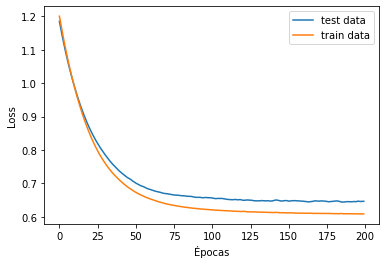

In [94]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej62_2_lossepoch_2.pdf')

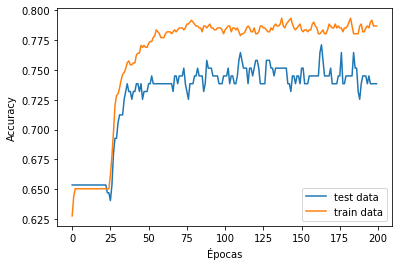

In [95]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej62_2_lossacc_2.pdf')